In [43]:
import pandas as pd

from data.constants import XAMI_MIMIC_PATH

import os

import seaborn as sn

In [5]:
chexpert_df = pd.read_csv(os.path.join(XAMI_MIMIC_PATH, "spreadsheets", "CXR-JPG", "cxr_chexpert.csv"))
negbio_df = os.path.join(XAMI_MIMIC_PATH, "spreadsheets", "CXR-JPG", "cxr_negbio.csv")



In [13]:
abnormalities = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

In [71]:
def sort_dict(d, desc=True):
    return dict(sorted(d.items(), key=lambda item: item[1] * (1 if desc else -1) ))

In [72]:
abnormality_case_counts = {}

for ab in abnormalities:
    abnormality_case_counts[ab] = len(chexpert_df[chexpert_df[ab]== 1.0])

In [73]:
abnormality_case_counts = sort_dict(abnormality_case_counts)

In [74]:
abnormality_case_counts

{'Pleural Other': 2011,
 'Fracture': 4390,
 'Lung Lesion': 6284,
 'Enlarged Cardiomediastinum': 7179,
 'Pneumothorax': 10358,
 'Consolidation': 10778,
 'Pneumonia': 16556,
 'Edema': 27018,
 'Cardiomegaly': 44845,
 'Atelectasis': 45808,
 'Lung Opacity': 51525,
 'Pleural Effusion': 54300,
 'Support Devices': 66558,
 'No Finding': 75455}

In [69]:
import matplotlib.pyplot as plt

In [81]:
def plot_dist(count_dict, fig_size =(20,10)):
    plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=fig_size)
    keys_list = list(count_dict.keys())
    plt.barh(keys_list, [ count_dict[k] for k in keys_list])

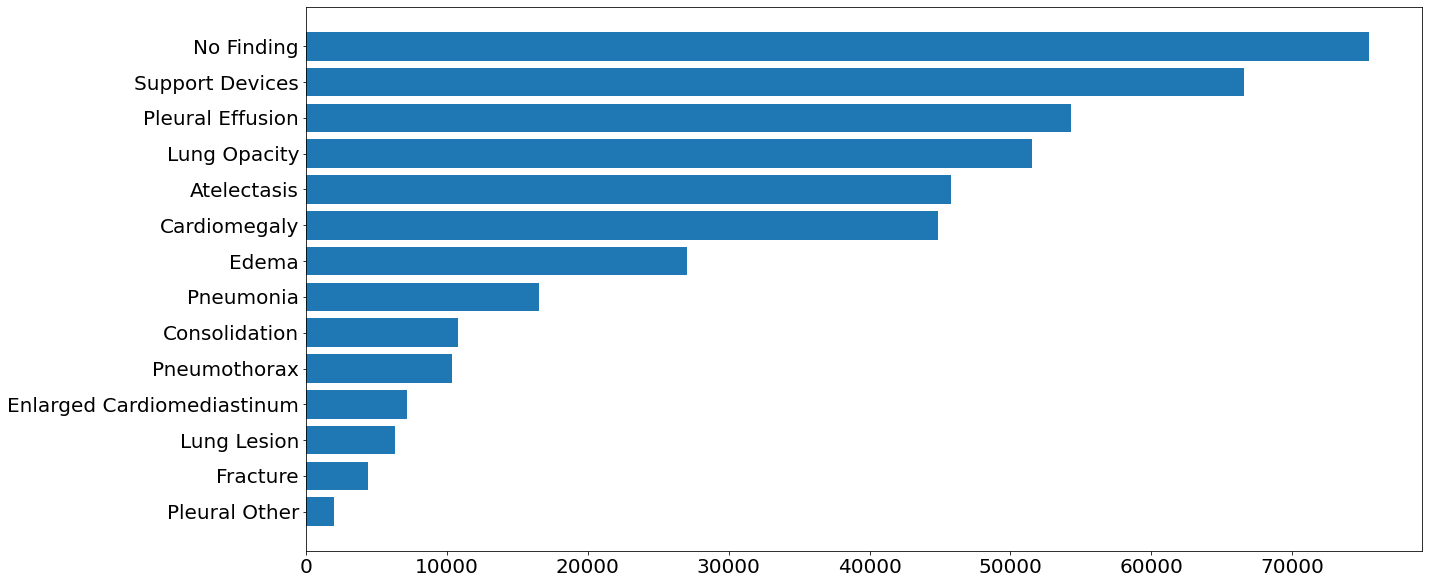

In [82]:
plot_dist(abnormality_case_counts)

In [23]:
# load reflacx and create their abnormality count.

reflacx_df = pd.read_csv(os.path.join("spreadsheets", "reflacx_cxr.csv"))

In [38]:
reflacx_abnormalities = ['Airway wall thickening',
       'Atelectasis', 'Consolidation', 'Enlarged cardiac silhouette',
       'Fibrosis', 'Groundglass opacity', 'Pneumothorax',
       'Pulmonary edema', 'Quality issue', 'Support devices',
       'Wide mediastinum', 'Abnormal mediastinal contour', 'Acute fracture',
       'Enlarged hilum', 'Hiatal hernia', 'High lung volume / emphysema',
       'Interstitial lung disease', 'Lung nodule or mass',
       'Pleural abnormality', 'Fracture']

In [41]:
reflacx_abnormality_case_counts = {}

for ab in reflacx_abnormalities:
    reflacx_abnormality_case_counts[ab] = len(reflacx_df[reflacx_df[ab]>0])

In [42]:
reflacx_abnormality_case_counts

{'Airway wall thickening': 21,
 'Atelectasis': 845,
 'Consolidation': 818,
 'Enlarged cardiac silhouette': 716,
 'Fibrosis': 6,
 'Groundglass opacity': 391,
 'Pneumothorax': 106,
 'Pulmonary edema': 428,
 'Quality issue': 10,
 'Support devices': 1318,
 'Wide mediastinum': 10,
 'Abnormal mediastinal contour': 84,
 'Acute fracture': 34,
 'Enlarged hilum': 56,
 'Hiatal hernia': 24,
 'High lung volume / emphysema': 89,
 'Interstitial lung disease': 34,
 'Lung nodule or mass': 163,
 'Pleural abnormality': 936,
 'Fracture': 14}

In [83]:
reflacx_abnormality_case_counts = sort_dict(reflacx_abnormality_case_counts)


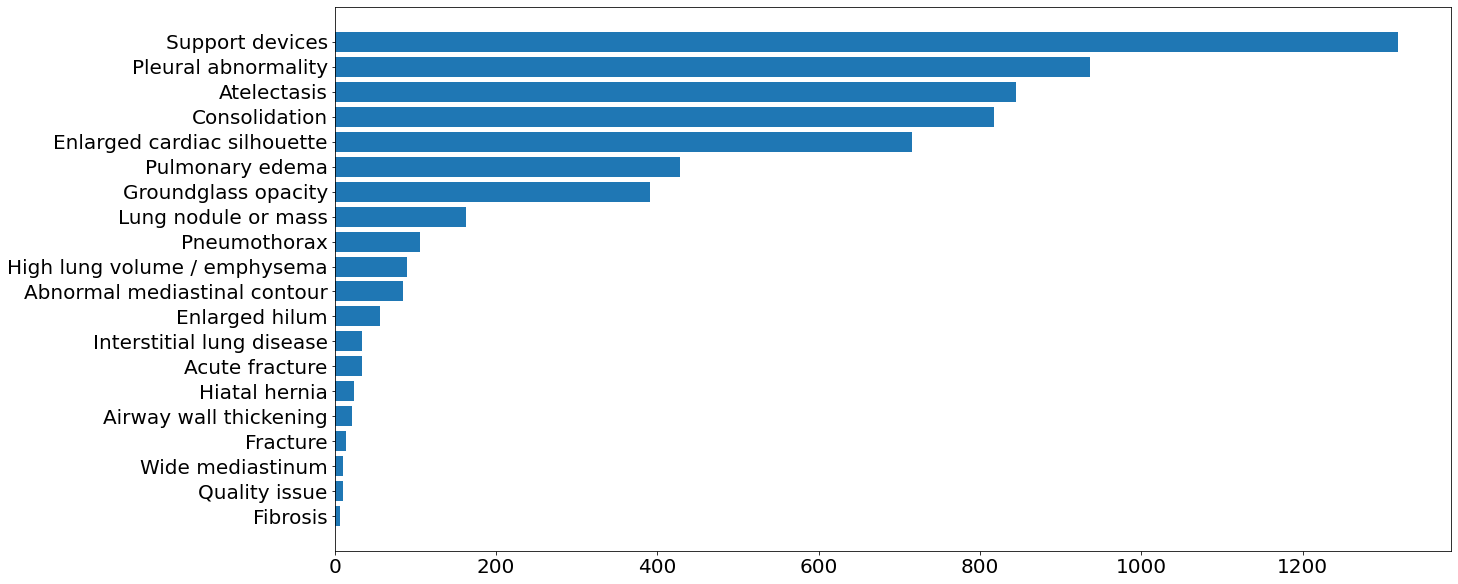

In [84]:
plot_dist(reflacx_abnormality_case_counts)